In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns


In [13]:
data = sns.load_dataset('titanic')

In [7]:
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [8]:
data.shape

(891, 15)

## Boxplot

In [29]:
data = data.dropna(subset=['age'])

<Axes: xlabel='sex', ylabel='age'>

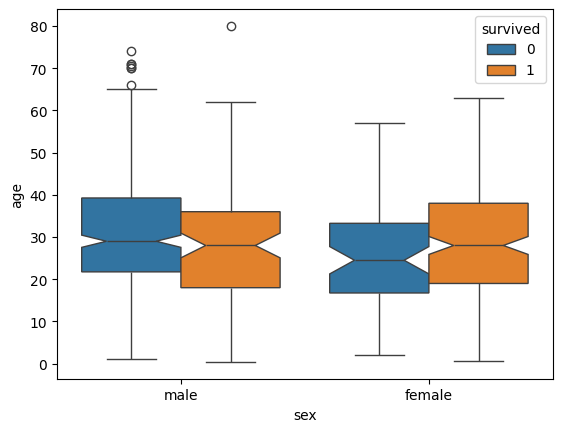

In [28]:
# notch give the median 
sns.boxplot(data=data,x="sex",y='age',hue='survived', notch=True)

In [ ]:
df = sns.load_dataset('train')

__________________________________________________
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)N

/var/folders/vx/fjf5z4sx0kdcyg_0w_bmkj700000gn/T/ipykernel_1073/735403317.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='sex', data=data, kind='count', height=4, aspect=.8, alpha=0.7, palette='muted')


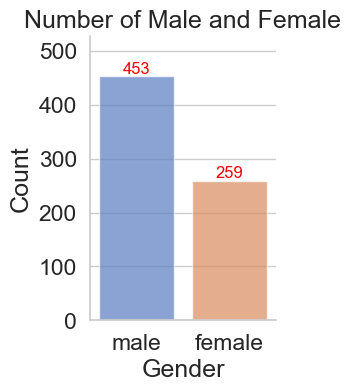

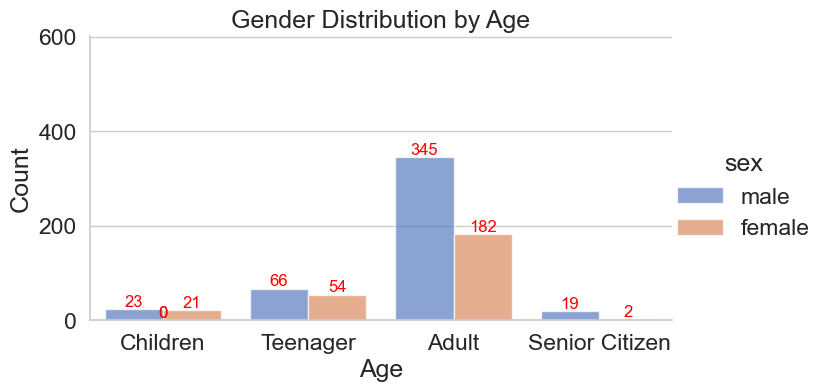

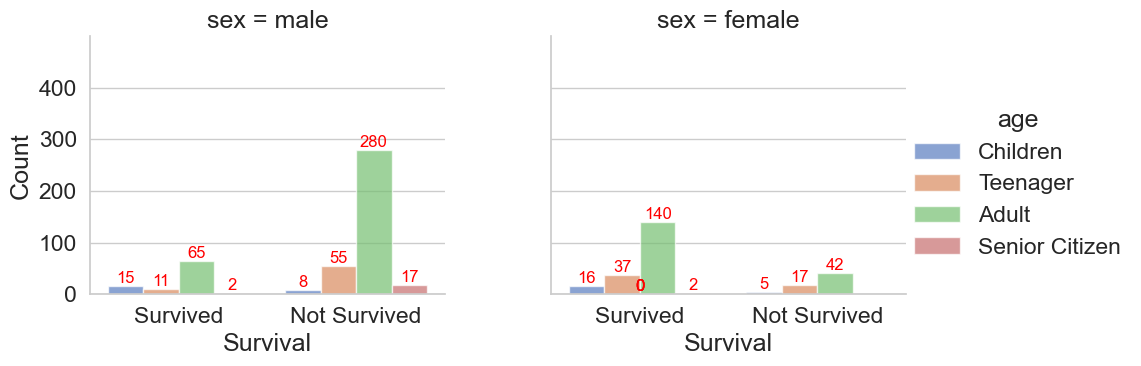

In [11]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Titanic dataset
# data = pd.read_csv('titanic.csv')
data = sns.load_dataset('titanic')

# Step 2: Check the first few rows of the dataset
data.head(10)

# Step 3: Print details of the dataset
print('_'*50)
print('*'*50)
print(data.info(memory_usage=False))
print('_'*50)

# Step 4: Check for missing values
data.isnull().sum()

# Step 5: Drop unnecessary columns and rows with missing values
data = data.drop(['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], axis=1)
data = data.dropna()

# Step 6: Map 0 to 'Not Survived' and 1 to 'Survived' in 'survived' column
data['survived'] = data['survived'].map({0: 'Not Survived', 1: 'Survived'})

# Step 7: Group passengers into bins of children, teenager, adult, senior citizen
data['age'] = pd.cut(data['age'], bins=[-1, 5, 19, 60, 150], labels=['Children','Teenager','Adult','Senior Citizen'], right=True)

# Step 8: Set the plot
sns.set(context='notebook', style='whitegrid', font_scale=1.5)

# Step 9: Define functions to display count values on top of bar graph
def assignAxis(df, g):
    # Get current axis on current figure
    for i in range(0, g.axes.size):
        ax = g.fig.get_axes()[i]
        displayCount(df, ax)

def displayCount(df, ax):
    # ylim max value to be set
    y_max = df.value_counts().max() + 75
    ax.set_ylim(top=y_max)
    # Iterate through the list of axes' patches
    for p in ax.patches:
        # checks if there index has 0 count
        if math.isnan(p.get_height()):
            ax.text(p.get_x() + p.get_width()/2, 0, 0, fontsize=12, color='red', ha='center', va='bottom')
            continue
        else:
            ax.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), fontsize=12, color='red', ha='center', va='bottom')

# Step 10: Plot number of males and females
g = sns.catplot(x='sex', data=data, kind='count', height=4, aspect=.8, alpha=0.7, palette='muted')
g.set(xlabel='Gender', ylabel='Count', title='Number of Male and Female')
assignAxis(data['sex'], g)

# Step 11: Plot number of males and females based on Age
g = sns.catplot(x='age', data=data, kind='count', height=4, aspect=1.8, hue='sex', alpha=0.7, palette='muted')
g.set(xlabel='Age', ylabel='Count', title='Gender Distribution by Age')
assignAxis(data['age'], g)

# Step 12: Plot people Survived based on gender and age
g = sns.catplot(x='survived', data=data, kind='count', height=4, aspect=1.2, hue='age', col='sex', alpha=0.7, palette='muted', order=['Survived', 'Not Survived'], legend_out=True)
g.set(xlabel='Survival', ylabel='Count')
g.fig.subplots_adjust(wspace=.3)
assignAxis(data['survived'], g)

plt.show()
